<a href="https://colab.research.google.com/github/GauraoM/Machine-Learning-Tutorial-Python/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.datasets import load_iris

In [5]:
# load iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
# Make a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Dropping feature columns
df.drop(['sepal length (cm)','sepal width (cm)','flower'], axis=1, inplace=True)

In [13]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


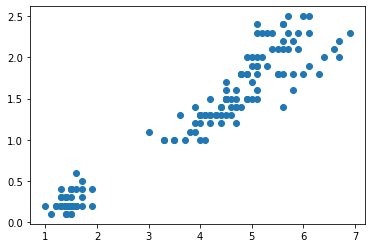

In [14]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [15]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
# Assign the labels
y_predicted = km.fit_predict(df)
y_predicted 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [18]:
# creating dataframe belongs to 3 different cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

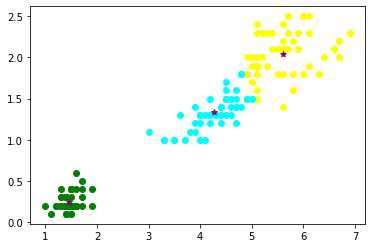

In [26]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='yellow')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='cyan')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', color='purple', label='centroid')

In [24]:
# get cluster
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

#### Elbow plot

In [32]:
sse = []
k_range = range(1,6)
for k in k_range:
  km = KMeans(k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

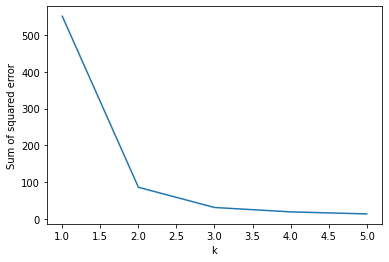

In [33]:
# Plot
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)